list of x points : [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
list of y points : [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
Input value to be approximated : 3.5
choose your preferred method (1 = Lagrange, 2 = NDD ) :2
Forward = 1, Backward = 2 :1
for x = 3.5 , y is approximately 7.64553


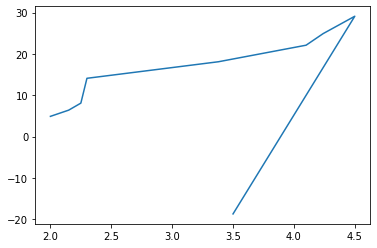

In [ ]:
Nomor 1)  

import matplotlib.pyplot as plt          #import module

titik_x = eval(input('list of x points : '))          #Input x sebagai list, contoh : [1,4,7,29]
titik_y = eval(input('list of y points : '))          #input y adalah hasil  fungsi dari input x, oleh karena itu input x harus sejajar dengan input y sebagai hasil x.
eval_x = eval(input('Input value to be approximated : ')) #Nilai x yang ingin diaproksimaksi nilai y nya

def LagrangePol(x,x_points,y_points):     #Pendefinisian fungsi Lagrange
  pol=0                            #set pol=0 dulu
  n = len(x_points)             #n setara dengan banyaknya list x
  for k in range(n):
    L = 1                       #karena perkalian, maka set L=1
    for i in range(n):
      if i!=k:                  #Berarti, i tidak sama dengan k
        L*=((x-x_points[i])/(x_points[k]-x_points[i]))      #Definisi L untuk menemukan aproksimasi y
    pol += y_points[k]*L       #pol adalah penjumlahan dari perkalian titik y pada suatu list k dengan definisi L
  return pol               #Hasil definisi dari fungsi lagrange, adalah pol
   
lag_approx = LagrangePol(eval_x,titik_x,titik_y)

x = titik_x + [eval_x]              #List titik x yang ada di awal ditambah titik x yang akan diaproksimasi nilai y nya
y = titik_y + [lag_approx]          #List titik y yang ada di awal ditambah titik y yang menjadi hasil aproksimasi dari x

plt.plot(x,y)                   #Membuat plot x,y
plt.show                       #menampilkan plot x,y

def DDTableGenerator(x_points,y_points):        #Pendefinisian Divided Differences untuk metode newton forward dan backward
  DDTable = [y_points]                   #Definisikan DDTable
  for column in range(1,len(y_points)):     #Untuk kolomnya dimulai dari 1 hingga panjang list dari y
    DDcolumn = []
    for row in range(len(DDTable[-1])-1):
      DD = (DDTable[-1][row+1]-DDTable[-1][row])                        
      /(x_points[column+row]-x_points[row])
      DDcolumn.append(DD)
    DDTable.append(DDcolumn)
  return DDTable                     #Hasil akhir DDTable

def ForwardDD(x,x_points,y_points):        #Definisi metode newton forward
  DDTable = DDTableGenerator(x_points,y_points)    
  pol = DDTable[0][0]
  mult_term = 1
  for k in range(1,len(DDTable)):
    mult_term*=(x-x_points[k-1])
    pol+=DDTable[k][0]*mult_term
  return pol

def BackwardDD(x,x_points,y_points):          #Definisi metode newton backward
  DDTable = DDTableGenerator(x_points,y_points)
  pol = DDTable[0][-1]
  mult_term = 1
  for k in range(1,len(DDTable)):
    mult_term*=(x-x_points[-k])
    pol+=DDTable[k][-1]*mult_term
  return pol

forw_approx = ForwardDD(eval_x,titik_x, titik_y)
back_approx = BackwardDD(eval_x,titik_x,titik_y)

choose = eval(input('choose your preferred method (1 = Lagrange, 2 = NDD ) :' ))        #Pilih Metode yang dipakai

if (choose == 1): 
       y_aproks = lag_approx                    #Pilih 1 jika mau menggunakan Lagrange, pilih yang lainnya (2) jika Newton Divided Differences
else:
       y_aproks = NDD

chooseNDD = eval(input('Forward = 1, Backward = 2 :'))

if (chooseNDD == 1): 
    NDD = forw_approx                 #Pilih 1 jika mau menggunakan forward NDD, pilih yang lainnya (2) jika NDD backward
else:
    NDD = back_approx



print('for x = {0} , y is approximately {1:.5f}'.format(eval_x,y_aproks))

Algoritma :
1. Masukkan Input yang akan dipakai, yaitu titik x, titik y, dan titik x yang akan diaproksimasi nilai y nya.
2. Terdapat 3 metode yang dipakai, yaitu Lagrange, NDD forward dan NDD backward.
3. Pada Lagrange, Algoritmanya :
          1) set pol = 1
          2) definisikan L
          3) ulangi atau looping L hingga semua pasangan x dan y tercapai
          4) Jumlahkan semua L nya
4. Pada NDD, harus ada pendefinisian terlebih dahulu bagaimana table akan bekerja.
5. Pada NDD forward, dimulai dari [0][0]. Yang diartikan sebagai dari x 0 dan y0. dan definisikan juga multiple termnya. nanti hasil keseluruhannya adalah jumlahan dari perkalian multiple dengan apa yang dihasilkan pada tabel.
6. Pada NDD backward, dimulai dari [0][-1]. Yang mengartikan dari kolom y yang paling akhir. dan definisikan juga multiple termnya. nanti hasil keseluruhannya adalah jumlahan dari perkalian multiple dengan apa yang dihasilkan pada tabel.
7. Setelah semua didefinisikan, maka sekarang tinggal eksekusi.
8. Jika pilih satu, maka artinya pilih metode lagrange
9. Jika pilih yang lainnya, maka artinya pilih metode NDD. Jika memilih NDD, nanti akan ada pilihan jika 1 maka forward, jika 2 maka backward.
10. Hasilnya tersedia untuk masing-masing metode

In [ ]:
Nomor 2)

Ketika memakai Metode lagrange hasil aproksimasinya adalah -18.68276
Ketika memakai Metode NDD forward hasil aproksimasinya adalah 7.64552
Ketika memakai Metode NDD backward hasil aproksimasinya adaalah 17.3987

Saya pikir diantara ketiganya tidak ada yang tepat, karena harusnya berada pada interval [18.1,22.1]